**SERVO MOTOR PREDICTION USING LINEAR REGRESSION**

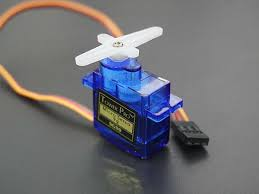

**OBJECTIVE**

Description:
This dataset provides information about a servo motor mechanism, capturing various parameters and their corresponding classes. Each entry in the dataset represents a specific configuration of the servo motor mechanism along with associated attributes.

Attributes:

*  Motor: Represents the type of motor used in the mechanism, categorized as 'A', 'B', 'C', 'D', or 'E'.
*  Screw: Indicates the type of screw used in the mechanism, classified as 'A', 'B', 'C', 'D', or 'E'.
*  Pgain: Refers to the proportional gain setting for the servo motor.
*  Vgain: Represents the velocity gain setting for the servo motor.
*  Class: Denotes the class label assigned to each configuration










DATA SOURCE

This dataset was originally sourced from a study or experiment involving servo motor mechanisms and has been made available for analysis and exploration. The dataset is suitable for use in machine learning projects, educational settings, and research related to servo motor systems and control mechanisms.

DATASET INFORMATION

The dataset contains a total of 5 entries, each representing a unique configuration of the servo motor mechanism. This dataset can be used for tasks such as classification or regression to predict the class label or performance metric based on the given attributes.


**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np

**IMPORT DATA**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Servo Mechanism.csv')

**DESCRIBE DATA**

In [3]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [5]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


**DATA PREPROCESSING**

In [6]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [7]:
df.shape

(167, 5)

In [8]:
# counts of categorical values
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [9]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [10]:
# encoding of categorical features
df.replace({'Motor':{'A':0, 'B':1, 'C':2, 'D':3, 'E':4}}, inplace=True)
df.replace({'Screw':{'A':0, 'B':1, 'C':2, 'D':3, 'E':4}}, inplace=True)

**Define Target Variable (y) and Feature Variables (X)**

In [11]:
y = df['Class']

In [12]:
y.shape

(167,)

In [13]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [14]:
X = df.drop('Class', axis = 1)

In [15]:
X.shape

(167, 4)

In [16]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


**TRAIN TEST SPLIT**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2529)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 4), (34, 4), (133,), (34,))

**MODELING**

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train, y_train)

LinearRegression()

**PREDICTION**

In [23]:
y_pred = lr.predict(X_test)

In [24]:
y_pred.shape

(34,)

In [25]:
y_pred

array([26.0341672 , 31.26527793, 19.54462992, 23.59257913, 40.03338157,
       24.98715011, 12.08334059, 19.69118525, 41.76945096, 42.17580349,
       13.81940998, 25.82275774, 17.80856053, 14.3952204 , 22.35061896,
       20.52679288, -4.69896026, 31.24237538, 32.97844477, -0.3683113 ,
       34.33106417, 32.57209223, 35.23152593, 29.93556108, 18.38437095,
        7.56418471, 29.78900574, 16.62539901, 24.49304089,  4.49839847,
       31.52507513, 24.0637858 , 36.04423101, 31.67163047])

**MODEL EVALUATION**

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
mean_squared_error(y_test, y_pred)

56.9486064993352

In [28]:
mean_absolute_error(y_test, y_pred)

6.3740446090815945

In [29]:
r2_score(y_test, y_pred)

0.7059325359329273

**DATA VISUALIZATION**

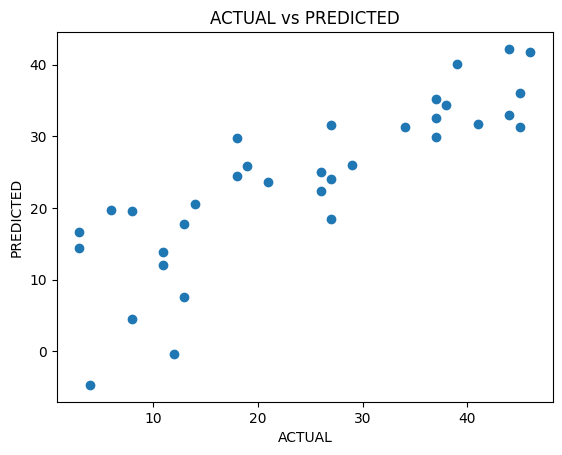

In [30]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('ACTUAL')
plt.ylabel('PREDICTED')
plt.title('ACTUAL vs PREDICTED')
plt.show()

**FUTURE PREDICTIONS**

**Lets select a random sample from existing dataset as new value**

Steps to follow:
1. Extract a random row using sample function
2. Separate X and y
3. Standardize X
4. Predict  



In [31]:
X_new = df.sample()

In [32]:
X_new

,Motor,Screw,Pgain,Vgain,Class
100,1,2,4,2,11


In [33]:
X_new.shape

(1, 5)

In [34]:
X_new = X_new.drop('Class', axis = 1)

In [35]:
X_new

,Motor,Screw,Pgain,Vgain
100,1,2,4,2


In [36]:
X_new.shape

(1, 4)

In [37]:
y_pred_new = lr.predict(X_new)

In [38]:
y_pred_new

array([21.42725465])